## Umbrales

### Se importan las librerias

In [12]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

### Se cargan los datos

In [2]:
df = pd.read_csv("data/data_all.csv", sep=";")

df

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


#### Agrupación del valor mínimo y máximo para las concentraciones

Con base al conjunto de datos, se compara el valor de la concentración anterior y la actual.

Si los valores son diferentes se incrementa la variable: var_b y se guarda el valor
en el vector var_buckets

Sino se continua el proceso de comparación

In [50]:
var_buckets = [0]
var_b = 0
for ind in range(1, df.shape[0]):
    if df['concentration'][ind-1] != df['concentration'][ind]:
        var_b += 1
        #print("df['concentration'][ind-1]", df['concentration'][ind-1])
        #print("df['concentration'][ind]", df['concentration'][ind])
    #print("var_b", var_b)
    var_buckets.append(var_b)
    #print("---------------------------------")

df['vars'] = var_buckets

#df['vars'] 

0       0
1       0
2       0
3       0
4       0
       ..
621    11
622    11
623    11
624    11
625    11
Name: vars, Length: 626, dtype: int64

In [51]:
df.groupby(['concentration']).max().reset_index()

,concentration,date,date(m/d/y),time,day,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity,vars
0,0.0,26/01/05 14:45,26/01/05,16.15,2,16.45,17.95,1.71,1.02,1.05,...,7.23,8.73,1.59,287,289,3,1.5,0.3,0.0,10
1,0.4,26/01/05 11:50,26/01/05,14.15,2,16.65,17.75,1.74,1.03,1.05,...,7.23,8.69,1.56,286,288,3,1.0,0.5,0.1,7
2,1.5,26/01/05 14:15,26/01/05,15.50,2,17.12,18.16,1.82,1.02,1.05,...,7.20,8.72,1.61,287,289,3,1.5,0.4,0.1,9
3,3.0,26/01/05 16:00,26/01/05,17.30,2,17.07,18.35,1.93,1.02,1.05,...,7.20,8.73,1.75,287,289,3,2.6,0.2,0.1,11


In [57]:
df_t = df[['concentration', 'chloride_80ft(mg/L)','vars']]

df_t

,concentration,chloride_80ft(mg/L),vars
0,0.0,16.33,0
1,0.0,16.39,0
2,0.0,16.39,0
3,0.0,16.38,0
4,0.0,16.39,0
...,...,...,...
621,3.0,16.37,11
622,3.0,16.38,11
623,3.0,16.37,11
624,3.0,16.35,11


In [76]:
df_max = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].max().reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_max"})
df_min = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].min().reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_min"})
df_std = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].std().reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_std"})
df_tf_p = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].quantile(.25).reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_q_25"})
df_sf_p = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].quantile(.75).reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_q_75"})
df_mean = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].mean().reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_mean"})
df_med = df_t.groupby(['vars', 'concentration'])['chloride_80ft(mg/L)'].median().reset_index().rename(columns = {"chloride_80ft(mg/L)": "chloride_80ft(mg/L)_med"})

df_res = pd.concat([df_max.iloc[:, -1], df_min.iloc[:, -1], df_std.iloc[:, -1], 
                    df_tf_p.iloc[:, -1], df_sf_p.iloc[:, -1], 
                    df_mean.iloc[:, -1], df_med.iloc[:, -1]], axis = 1)


df_res

,chloride_80ft(mg/L)_max,chloride_80ft(mg/L)_min,chloride_80ft(mg/L)_std,chloride_80ft(mg/L)_q_25,chloride_80ft(mg/L)_q_75,chloride_80ft(mg/L)_mean,chloride_80ft(mg/L)_med
0,16.43,16.33,0.026514,16.390,16.4175,16.397333,16.405
1,16.65,16.36,0.080864,16.420,16.5200,16.481644,16.460
2,16.45,16.35,0.024389,16.410,16.4300,16.416552,16.420
3,17.12,16.32,0.261638,16.430,16.8400,16.622533,16.500
4,16.41,16.29,0.029883,16.350,16.3800,16.366333,16.370
5,17.07,16.28,0.255809,16.380,16.8200,16.576986,16.440
6,15.87,15.62,0.047528,15.710,15.7650,15.735484,15.730
7,16.18,15.75,0.093316,15.990,16.0700,16.014110,16.020
8,16.28,16.11,0.039062,16.165,16.2300,16.195161,16.190
9,16.67,16.16,0.127229,16.320,16.4900,16.404533,16.360


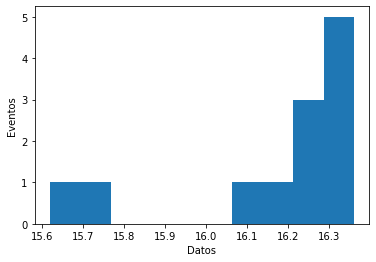

In [114]:
(counts, bins, patches) = plt.hist(df_res['chloride_80ft(mg/L)_min'])
plt.xlabel("Datos")
plt.ylabel("Eventos")
plt.show()

In [113]:
#df['chloride_80ft(mg/L)'].describe()

#### Comparación de los experimentos para obtener el umbral (selección de cuantiles)

* Como ya se ha mencionado, no existe un umbral absoluto para cada sensor.  Esto se debe al hecho de que nuestra línea de base cambia constantemente con cada experimento.

* Por lo tanto, tenemos que calcular las relaciones entre el pico y la línea de base anterior a ese experimento, como se mencionó anteriormente, estas relaciones se deben realizar por pares.

* Por lo tanto, creamos los mapeos

-----------------
* Para realizar las relaciones, necesitamos un valor numérico que represente toda la distribución de cada experimento.

* No podemos considerar la media y la mediana aquí, esto es debido al hecho del retraso en las salidas sensoriales (mencionado en EDA).

* Por lo tanto, consideraremos valores más extremos para obtener esos números.

* Como se menciona en el EDA, la contaminación causa tanto incremento como decremento en las lecturas.

* Por lo tanto, necesitamos tomar dos numéricos como representativos de cada sensor.

------------------

* Tomamos 0,9 cuantiles como representación numérica para incrementos y 0,3 como representación numérica para decrementos.

* Una vez más, estos cuantiles extremos se consideran simplemente porque la mayoría de los puntos de datos son equivalentes a la lectura de referencia adyacente.

* Estos cuantiles extremos nos ayudan a ignorar esos valores.

* El número exacto se obtuvo mediante experimentos, estos arrojaron las proporciones más sensibles (en términos de representación de datos)

In [109]:
df_piv_inc = df.groupby(["vars", "concentration"]).quantile(0.9).reset_index
df_piv_dec = df.groupby(["vars", "concentration"]).quantile(0.3).reset_index

#df_piv_inc

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_3379/3354724941.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_piv_inc = df.groupby(["vars", "concentration"]).quantile(0.9).reset_index
/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_3379/3354724941.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_piv_dec = df.groupby(["vars", "concentration"]).quantile(0.3).reset_index


#### Obtener los umbrales

In [115]:
# El código no funciona
'''
ratio_l = []
for i_1, i_2 in zip(range(df_piv_inc.shape[0]), range (1, df_piv_inc.shape[0])):
    if i_1%2 == 0:
        x = (df_piv_inc.iloc[i_2, 3:]/ df_piv_inc.iloc[i_1, 3:])
        x["var_r"] = f"{df_piv_inc.iloc[i_2, 0]}_{df_piv_inc.iloc[i_1, 0]}"
        x["conc_r"] = f"{df_piv_inc.iloc[i_1, 1]}_{df_piv_inc.iloc[i_1, 1]}"
        ratio_l.append(x)
ratio_ind_df = pd.concet(ratio_l, axis = 1)

ratio_ind_df 
'''

AttributeError: 'function' object has no attribute 'shape'

In [40]:
# Se cre el dataframe res_df

datos = {
        'sensors':    ["chloride_80ft(mg/L)", "chloride_1100ft(mg/L)", 
                       "CL2_80ft(PPM)", "CL2_1100ft(PPM)", 
                       "DO_YSI_80ft(mg/L)", "DO_YSI_1100ft(mg/L)", 
                       "FreeClorine-ATI_80ft(PPM)", "FreeClorine-ATI_1100ft(PPM)", 
                       "FreeClorine-Depolox_80ft", "FreeClorine-Depolox_1100ft", 
                       "ORP_YSI_80ft(mV)", "ORP_YSI_1100ft(mV)", 
                       "pH_YSI_80ft", "pH_YSI_1100ft", 
                       "sp_cond_YSI_80ft(µS/cm)", "sp_cond_YSI_1100ft(µS/cm)", 
                       "turbidity_YSI_80ft(NTU+)", "turbidity_YSI_11000ft(NTU+)"],
        'ratios_inc': [1.028, 1.019, 
                       0.998, 0.996, 
                       1.003, 1.004, 
                       0.996, 0.994, 
                       1.014, 0.999, 
                       0.997, 1.005, 
                       1.000, 1.000, 
                       1.001, 1.000, 
                       1.020, 1.722],
        'ratios_dec': [1.006, 1.005, 
                       0.874, 0.916, 
                       1.002, 1.003, 
                       0.930, 0.765, 
                       0.928, 0.800, 
                       0.956, 0.990, 
                       0.997, 0.994, 
                       1.001, 1.001, 
                       1.722, 1.722]}

res_df = pd.DataFrame(datos)

res_df

,sensors,ratios_inc,ratios_dec
0,chloride_80ft(mg/L),1.028,1.006
1,chloride_1100ft(mg/L),1.019,1.005
2,CL2_80ft(PPM),0.998,0.874
3,CL2_1100ft(PPM),0.996,0.916
4,DO_YSI_80ft(mg/L),1.003,1.002
5,DO_YSI_1100ft(mg/L),1.004,1.003
6,FreeClorine-ATI_80ft(PPM),0.996,0.930
7,FreeClorine-ATI_1100ft(PPM),0.994,0.765
8,FreeClorine-Depolox_80ft,1.014,0.928
9,FreeClorine-Depolox_1100ft,0.999,0.800


#### Seleccionar el radio del umbral

In [36]:
def get_thresh(x):
    if x["ratios_dec"] < 1:
        return x["ratios_dec"]
    return x["ratios_inc"]


In [41]:
res_df["thresh"] = res_df.apply(lambda x: get_thresh(x), axis = 1)

In [42]:
def get_pos_neg(row):
    if row["thresh"] == row["ratios_dec"]:
        return "lesser"
    if row["thresh"] == row['ratios_inc']:
        return "more"

In [44]:
res_df["set_mapping"] = res_df.apply(lambda x: get_pos_neg(x), axis = 1)

res_df

,sensors,ratios_inc,ratios_dec,thresh,set_mapping
0,chloride_80ft(mg/L),1.028,1.006,1.028,more
1,chloride_1100ft(mg/L),1.019,1.005,1.019,more
2,CL2_80ft(PPM),0.998,0.874,0.874,lesser
3,CL2_1100ft(PPM),0.996,0.916,0.916,lesser
4,DO_YSI_80ft(mg/L),1.003,1.002,1.003,more
5,DO_YSI_1100ft(mg/L),1.004,1.003,1.004,more
6,FreeClorine-ATI_80ft(PPM),0.996,0.930,0.930,lesser
7,FreeClorine-ATI_1100ft(PPM),0.994,0.765,0.765,lesser
8,FreeClorine-Depolox_80ft,1.014,0.928,0.928,lesser
9,FreeClorine-Depolox_1100ft,0.999,0.800,0.800,lesser
